In [37]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

In [2]:
df=pd.read_csv(r'C:\Users\User\Desktop\ELU\weekly assignments\module5\week3\Mall_Customers.csv',sep=';')
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
df.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [10]:
# Check for null values in the dataframe
null_values = df.isnull().sum()

#Print the number of null values in each column
print('sum of null values:')
print(null_values)

sum of null values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [11]:
print('Number of duplicates:',df.duplicated().sum())

Number of duplicates: 0


In [4]:
# drop customerID from the data set
df.drop(columns="CustomerID", inplace=True)

***********************

# EDA

<AxesSubplot:xlabel='Gender', ylabel='Percent'>

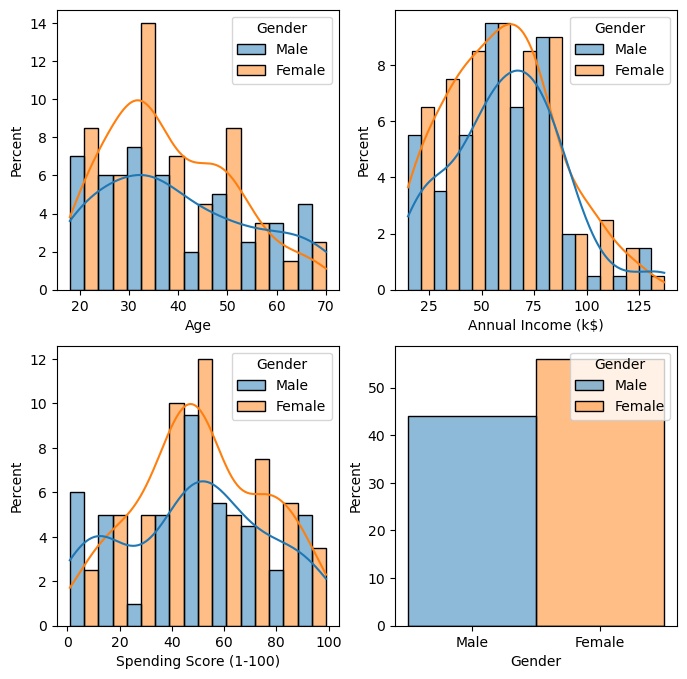

In [29]:
fig, axes = plt.subplots(ncols=2,nrows=2, figsize=(8,8))

sns.histplot(data=df, x ="Age",kde=True,ax=axes[0][0],stat="percent",hue="Gender",multiple="dodge")
sns.histplot(data=df, x ="Annual Income (k$)",kde=True,ax=axes[0][1],stat="percent",hue="Gender",multiple="dodge")
sns.histplot(data=df, x ="Spending Score (1-100)",kde=True,ax=axes[1][0],stat="percent",hue="Gender",multiple="dodge")
sns.histplot(data=df, x ="Gender",ax=axes[1][1],hue="Gender",stat="percent")

In [30]:
Young = int(df[df["Age"]<30].count()[0]/len(df)*100)
Mid = int(df[(df["Age"]>30)&(df["Age"]<50)].count()[0]/len(df)*100)
Old = int(df[df["Age"]<30].count()[0]/len(df)*100)
               
Young_F = int(df[(df["Age"]<30)&(df["Gender"]=="Female")].count()[0]/df[df["Age"]<30].count()[0]*100)
Mid_F = int(df[(df["Age"]>=30)&(df["Age"]<=50)&(df["Gender"]=="Female")].count()[0]/df[(df["Age"]>30)&(df["Age"]<50)].count()[0]*100)
Old_F = int(df[(df["Age"]>50)&(df["Gender"]=="Female")].count()[0]/df[df["Age"]>50].count()[0]*100)

print(f"{Young} % young customers of which {Young_F} % are Female") #Young
print(f"{Mid} % middle aged customers {Mid_F} % are Female") #Young
print(f"{Old} % older customers {Old_F} % are Female") #Young

27 % young customers of which 52 % are Female
46 % middle aged customers 69 % are Female
27 % older customers 45 % are Female


******************************

# Model (Clustering)

First of all i will normalize all my values:

In [5]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

df = df.apply(lambda x: object_to_int(x))
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [6]:
# Extract numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Normalize the numeric columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


All the values have been normalized.

In [15]:
#Choosing the Annual Income (k$) & Spending Score (1-100)
x = df.iloc[:,[2,3]].values
print(x)


[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]
 [-1.66266033  1.00159627]
 [-1.62449091 -1.71591298]
 [-1.62449091  1.70038436]
 [-1.58632148 -1.83237767]
 [-1.58632148  0.84631002]
 [-1.58632148 -1.4053405 ]
 [-1.58632148  1.89449216]
 [-1.54815205 -1.36651894]
 [-1.54815205  1.04041783]
 [-1.54815205 -1.44416206]
 [-1.54815205  1.11806095]
 [-1.50998262 -0.59008772]
 [-1.50998262  0.61338066]
 [-1.43364376 -0.82301709]
 [-1.43364376  1.8556706 ]
 [-1.39547433 -0.59008772]
 [-1.39547433  0.88513158]
 [-1.3573049  -1.75473454]
 [-1.3573049   0.88513158]
 [-1.24279661 -1.4053405 ]
 [-1.24279661  1.23452563]
 [-1.24279661 -0.7065524 ]
 [-1.24279661  0.41927286]
 [-1.20462718 -0.74537397]
 [-1.20462718  1.42863343]
 [-1.16645776 -1.7935561 ]
 [-1.16645776  0.88513158]
 [-1.05194947 -1.7935561 ]
 [-1.05194947  1.62274124]
 [-1.05194947 -1.4053405 ]
 [-1.05194947  1.19570407]
 [-1.01378004 -1.28887582]
 

In [16]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,50):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x)

  wcss.append(kmeans.inertia_)

c:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


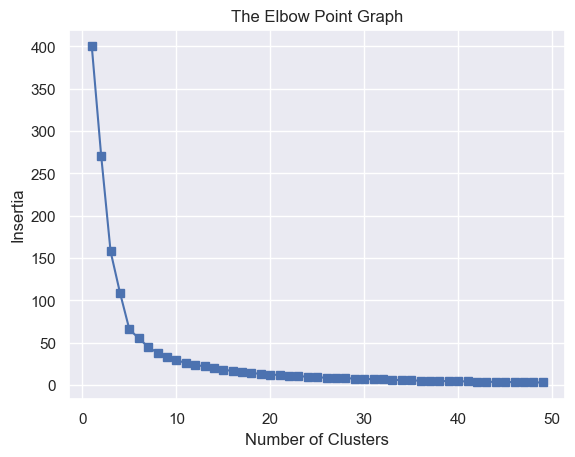

In [73]:
# plot an elbow graph

sns.set()
plt.plot(range(1,50), wcss,marker="s")
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('Insertia')
plt.show()

In [18]:
from sklearn.metrics import silhouette_score
for n_cluster in range(2,6):
    kmeans = KMeans(n_clusters=n_cluster).fit(df)
    label = kmeans.labels_
    sil_coeff = silhouette_score(df, label, metric='euclidean')
scaler = StandardScaler()
X_kmeans =  scaler.fit_transform(x)
print(X_kmeans)   
print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]
 [-1.66266033  1.00159627]
 [-1.62449091 -1.71591298]
 [-1.62449091  1.70038436]
 [-1.58632148 -1.83237767]
 [-1.58632148  0.84631002]
 [-1.58632148 -1.4053405 ]
 [-1.58632148  1.89449216]
 [-1.54815205 -1.36651894]
 [-1.54815205  1.04041783]
 [-1.54815205 -1.44416206]
 [-1.54815205  1.11806095]
 [-1.50998262 -0.59008772]
 [-1.50998262  0.61338066]
 [-1.43364376 -0.82301709]
 [-1.43364376  1.8556706 ]
 [-1.39547433 -0.59008772]
 [-1.39547433  0.88513158]
 [-1.3573049  -1.75473454]
 [-1.3573049   0.88513158]
 [-1.24279661 -1.4053405 ]
 [-1.24279661  1.23452563]
 [-1.24279661 -0.7065524 ]
 [-1.24279661  0.41927286]
 [-1.20462718 -0.74537397]
 [-1.20462718  1.42863343]
 [-1.16645776 -1.7935561 ]
 [-1.16645776  0.88513158]
 [-1.05194947 -1.7935561 ]
 [-1.05194947  1.62274124]
 [-1.05194947 -1.4053405 ]
 [-1.05194947  1.19570407]
 [-1.01378004 -1.28887582]
 

In [19]:


silhouette_coef = []

for cluster in range(2,11):
    kmeans = KMeans(n_clusters = cluster, init = 'k-means++', random_state = 1)
    kmeans.fit(X_kmeans)
    score = silhouette_score(X_kmeans, kmeans.labels_)
    silhouette_coef.append(score)

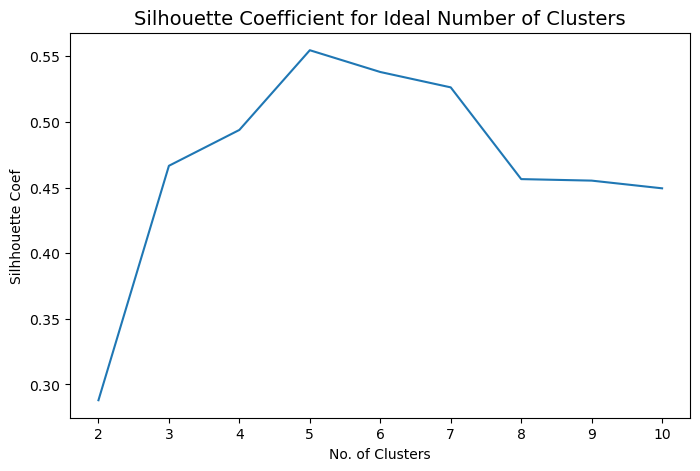

In [20]:
plt.figure(figsize=(8,5))
plt.plot(range(2,11), silhouette_coef)
plt.xticks(range(2,11))
plt.title('Silhouette Coefficient for Ideal Number of Clusters', fontsize=14)
plt.xlabel('No. of Clusters')
plt.ylabel('Silhhouette Coef')
plt.show()

Based on the silhouette Coefficient the ideal number of clusters iss 5

In [83]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
y = kmeans.fit_predict(x)

print(y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


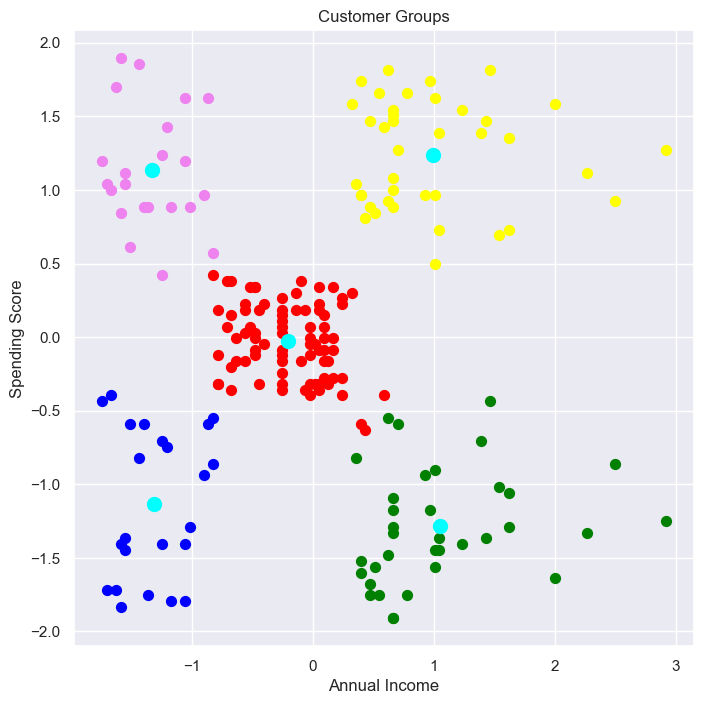

In [84]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0], x[y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(x[y==1,0], x[y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(x[y==2,0], x[y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(x[y==3,0], x[y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(x[y==4,0], x[y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# Hierarchial analysis

In [27]:
## Let's start the Hierarchial analysis by normalizing the data and 
## building a dataframe for analysis

norm = MinMaxScaler()

X_Hierar = norm.fit_transform(x)
X_Hierar = pd.DataFrame(X_Hierar)


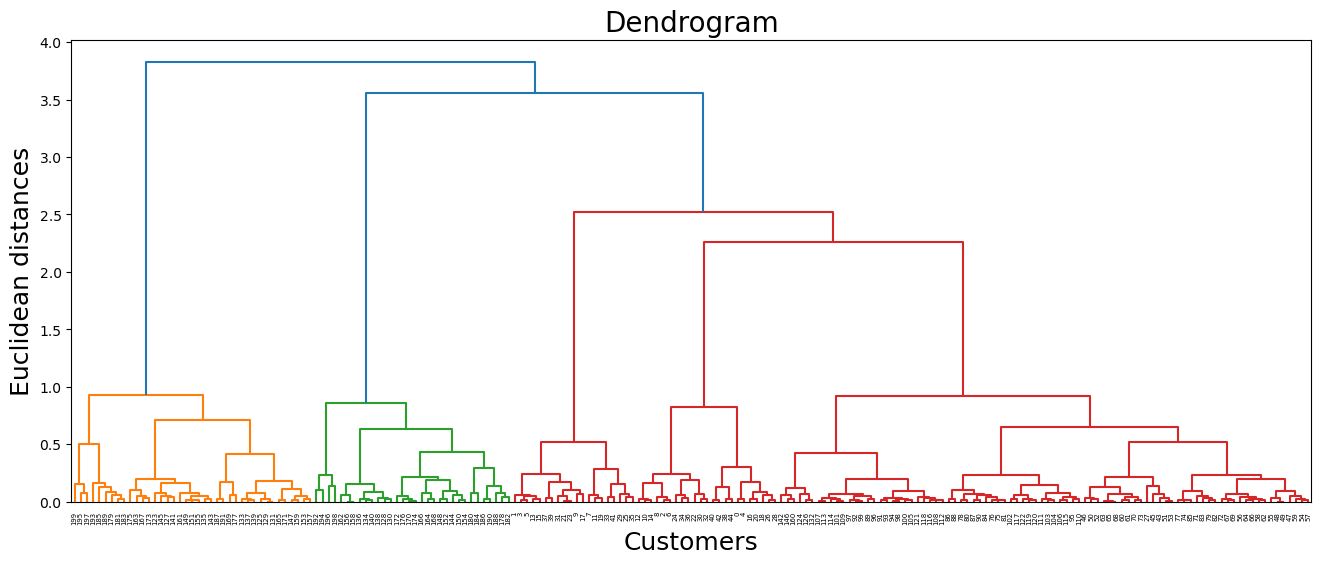

In [33]:
## Build dendrogram to find out the optimal number of clusters

plt.figure(figsize=(16,6))
dendrogram = shc.dendrogram(shc.linkage(X_Hierar, method = 'ward'))
plt.title('Dendrogram', fontsize=20)
plt.xlabel('Customers', fontsize=18)
plt.ylabel('Euclidean distances', fontsize=18)
plt.show()

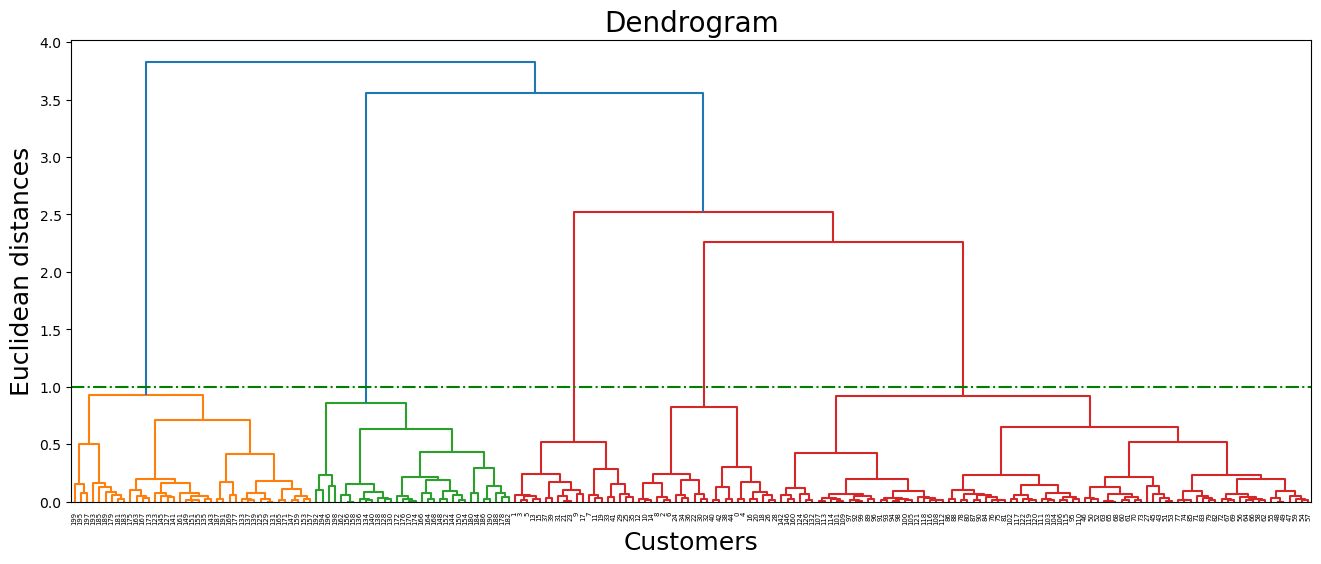

In [34]:
## Draw the threshold level to identify the ideal number of clusters

plt.figure(figsize=(16,6))
dendrogram = shc.dendrogram(shc.linkage(X_Hierar, method = 'ward'))
plt.axhline(y = 1, color = 'g', linestyle = 'dashdot')

plt.title('Dendrogram', fontsize=20)
plt.xlabel('Customers', fontsize=18)
plt.ylabel('Euclidean distances', fontsize=18)
plt.show()

The threshold level intersects 5 vertical lines, hence we can conclude that the number of clusters we can have as 5.

* # The clusters in both the KMeans and Hierarchial models reflect that low income customers are grouped into two peculiar segments, one who spend low and another who spend high.
* # Similarly, the high income customers are also grouped into two broader segments, one who spend low and another who spend high.
* # On the other hand, the middle income customers are predominantly segregated into a group that spends moderately, not high and not low.